In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [4]:
data = pd.read_csv('dataset.csv')

In [6]:
data.shape


(541909, 8)

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
customer_product_matrix = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='count', fill_value=0)

In [9]:
normalized_matrix = customer_product_matrix.apply(lambda x: x / x.sum(), axis=1)

In [10]:
inertia = []
possible_clusters = range(1, 11)  # Try different numbers of clusters
for num_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(normalized_matrix)
    inertia.append(kmeans.inertia_)

C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change

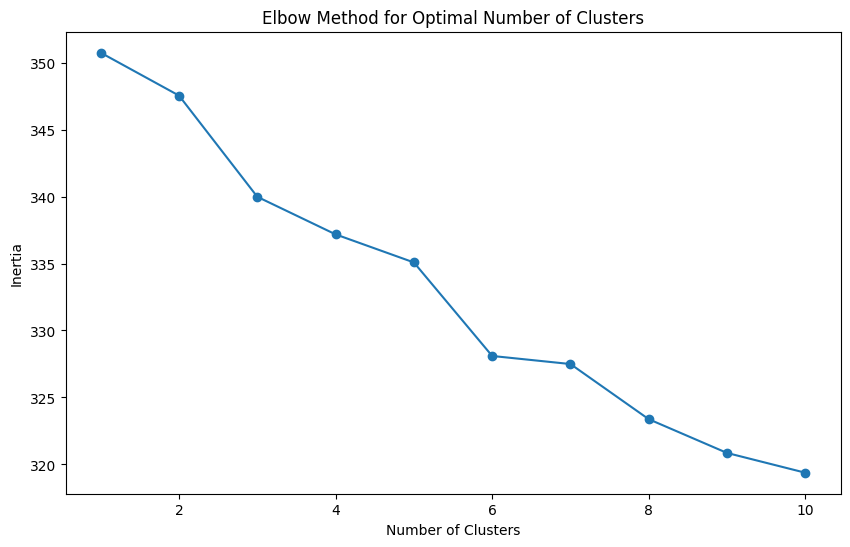

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(possible_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [12]:
optimal_num_clusters = 7  # Example: Replace with the optimal number you visually selected
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
clusters = kmeans.fit_predict(normalized_matrix)

C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(normalized_matrix)

In [14]:
reduced_df = pd.DataFrame(reduced_matrix, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = clusters

In [15]:
cluster_centers = pca.transform(kmeans.cluster_centers_)


C:\python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


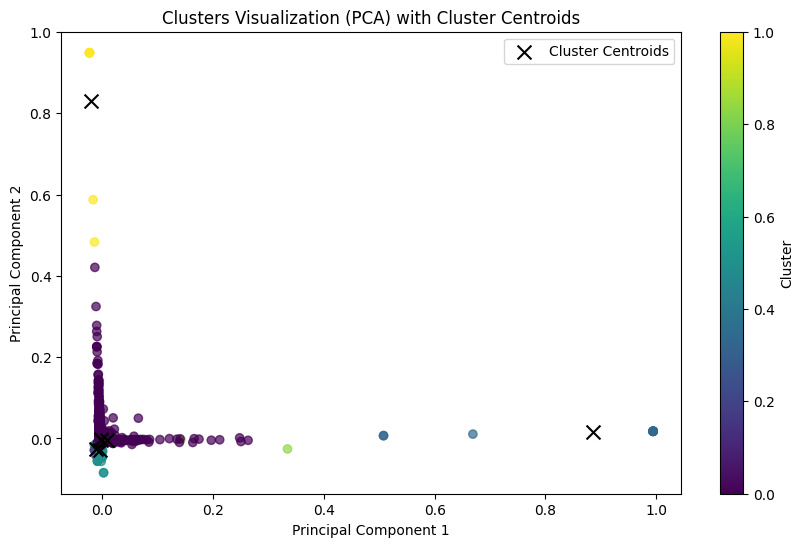

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Cluster'], cmap='viridis', alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=100, c='black', label='Cluster Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization (PCA) with Cluster Centroids')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

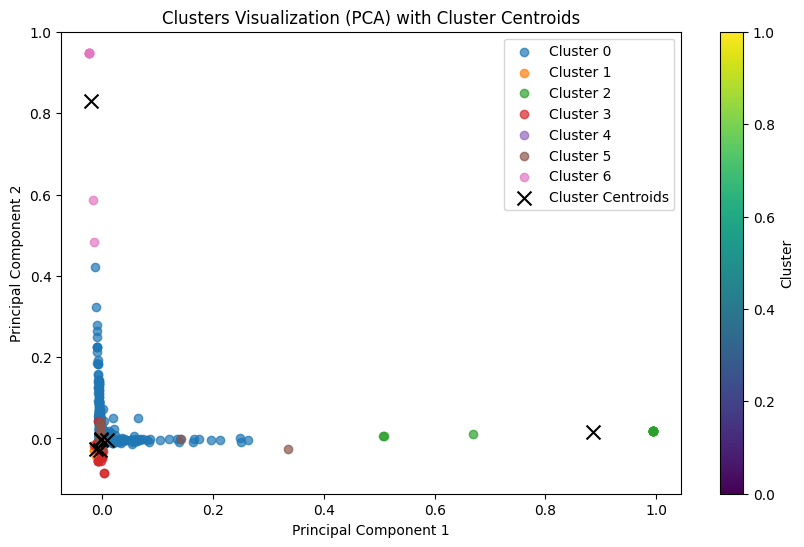

In [18]:
# Plot the clusters in a 2D space along with the centroids
plt.figure(figsize=(10, 6))

# Plot each cluster separately and show data points within each cluster
for cluster_label in range(optimal_num_clusters):
    cluster_data = reduced_df[reduced_df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}', alpha=0.7)

# Plot cluster centroids
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=100, c='black', label='Cluster Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization (PCA) with Cluster Centroids')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

Silhouette Score: 0.28719663834672315
Calinski-Harabasz Score: 51.63426144077396
Davies-Bouldin Score: 1.814478569019516


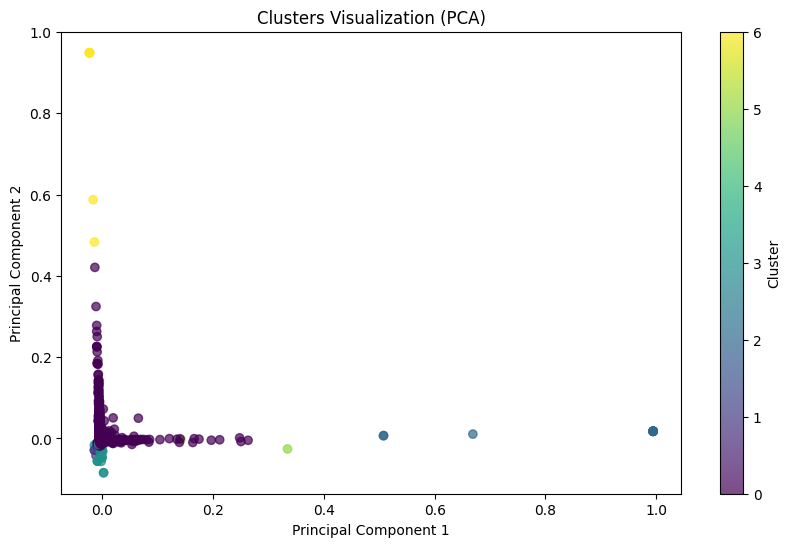

In [19]:
silhouette_avg = silhouette_score(normalized_matrix, clusters)
calinski_score = calinski_harabasz_score(normalized_matrix, clusters)
davies_bouldin_avg = davies_bouldin_score(normalized_matrix, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_score}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")

# Plot the clusters in a 2D space with cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization (PCA)')
plt.colorbar(label='Cluster')
plt.show()